In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GroupShuffleSplit, GroupKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, 
                             roc_auc_score, classification_report, confusion_matrix)
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Classifier By Malware Type

In [ ]:
# Load the dataset:
df = pd.read_csv(r'INSERT DATASET PATH')

# Fill the missing values:
df.fillna(method="ffill", inplace=True)

In [39]:
# Functions to extract unique files and records for each category:
def find_category(file_name):
    if "-" in file_name:
        return file_name.split("-")[0]
    else:
        return file_name

def find_category_name(file_name):
    if "-" in file_name:
        parts = file_name.split("-")
        return parts[1] if len(parts) > 1 else file_name
    else:
        return file_name

def extract_unique_file_id(file_name):
    return file_name.rsplit('-', 1)[0]

In [40]:
# Create new columns:
df["category"] = df["Category"].apply(find_category)
df["category_name"] = df["Category"].apply(find_category_name)
df["unique_file_id"] = df["Category"].apply(extract_unique_file_id)


# Compute unique file counts per malware family and create a summary DataFrame:
unique_counts = df.groupby('category_name')['unique_file_id'].nunique()
total_records = df['category_name'].value_counts()
df_category_summary = pd.DataFrame({
    'Total_Records': total_records,
    'Unique_File_Counts': unique_counts
})
df_category_summary['Percentage'] = (df_category_summary['Total_Records'] / len(df)) * 100
df_category_summary = df_category_summary.reset_index().rename(columns={'index': 'category_name'})
print("Category Summary:")
print(df_category_summary)
df_category_summary.to_csv("df_category_summary.csv", index=False)

Category Summary:
   category_name  Total_Records  Unique_File_Counts  Percentage
0   180solutions           2000                 200    3.413202
1            Ako           2000                 200    3.413202
2         Benign          29298                   1   50.000000
3            CWS           2000                 200    3.413202
4          Conti           1988                 200    3.392723
5         Emotet           1967                 200    3.356884
6          Gator           2200                 216    3.754522
7           Maze           1958                 176    3.341525
8           Pysa           1717                 192    2.930234
9        Reconyc           1570                 157    2.679364
10       Refroso           2000                 200    3.413202
11          Scar           2000                 200    3.413202
12         Shade           2128                 229    3.631647
13          TIBS           1410                 141    2.406308
14   Transponder      

CLASSIFIERS BY MALWARE TYPE WITH svscan.nservices IN DATASET:

Total records: 58596
Train: 38199 (65.19%)
Test: 17528 (29.91%)
Validation: 2869 (4.9%)

Training and evaluating RandomForest...
Best parameters for RandomForest: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 50}


100%|===================| 280048/280448 [09:22<00:00]        


SHAP Feature Importance for 'Conti' - RandomForest:
svcscan.nservices                         5.143008e-03
dlllist.avg_dlls_per_proc                 4.612186e-03
svcscan.kernel_drivers                    3.728738e-03
handles.nsection                          3.718760e-03
svcscan.shared_process_services           2.257196e-03
handles.nthread                           2.148768e-03
handles.nmutant                           1.926850e-03
handles.nkey                              1.844361e-03
malfind.uniqueInjections                  1.777370e-03
handles.nevent                            1.648156e-03
malfind.commitCharge                      1.573675e-03
pslist.avg_threads                        1.512366e-03
ldrmodules.not_in_load_avg                1.412798e-03
malfind.protection                        1.286431e-03
ldrmodules.not_in_load                    1.284077e-03
ldrmodules.not_in_mem                     1.248596e-03
handles.nsemaphore                        1.201226e-03
handles.nfil

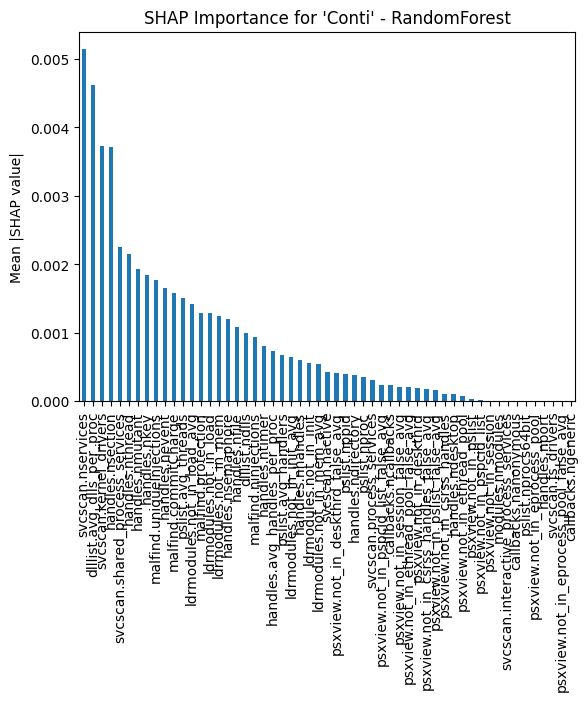


Validation Set Classification Report for RandomForest:
              precision    recall  f1-score   support

180solutions     0.0000    0.0000    0.0000        90
         Ako     0.1373    0.1167    0.1261        60
      Benign     1.0000    1.0000    1.0000      1475
         CWS     0.0000    0.0000    0.0000        50
       Conti     0.0000    0.0000    0.0000       108
      Emotet     0.1702    0.3000    0.2172        80
       Gator     0.6197    0.3793    0.4706       116
        Maze     0.2093    0.3000    0.2466        90
        Pysa     1.0000    0.0515    0.0980        97
     Reconyc     1.0000    0.0286    0.0556        70
     Refroso     0.4204    0.4125    0.4164       160
        Scar     0.1622    0.3600    0.2236       100
       Shade     0.3131    0.4429    0.3669        70
        TIBS     0.5882    0.1667    0.2597        60
 Transponder     0.1755    0.3909    0.2423       110
        Zeus     0.1737    0.3083    0.2222       133

    accuracy            

C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

Best parameters for KNN: {'clf__n_neighbors': 7}
SHAP explanation failed for KNN: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier(n_neighbors=7, weights='distance')

Validation Set Classification Report for KNN:
              precision    recall  f1-score   support

180solutions     0.2319    0.1778    0.2013        90
         Ako     0.0789    0.1000    0.0882        60
      Benign     1.0000    1.0000    1.0000      1475
         CWS     0.0875    0.1400    0.1077        50
       Conti     0.1412    0.1111    0.1244       108
      Emotet     0.2326    0.2500    0.2410        80
       Gator     0.4110    0.5172    0.4580       116
        Maze     0.1683    0.1889    0.1780        90
        Pysa     0.1471    0.1031    0.1212        97
     Reconyc     0.4194    0.1857    0.2574        70
     Refroso     0.5833    0.5250    0.5526       160
        Scar     0.2203    0.2600    0.2385       100
       Shade     

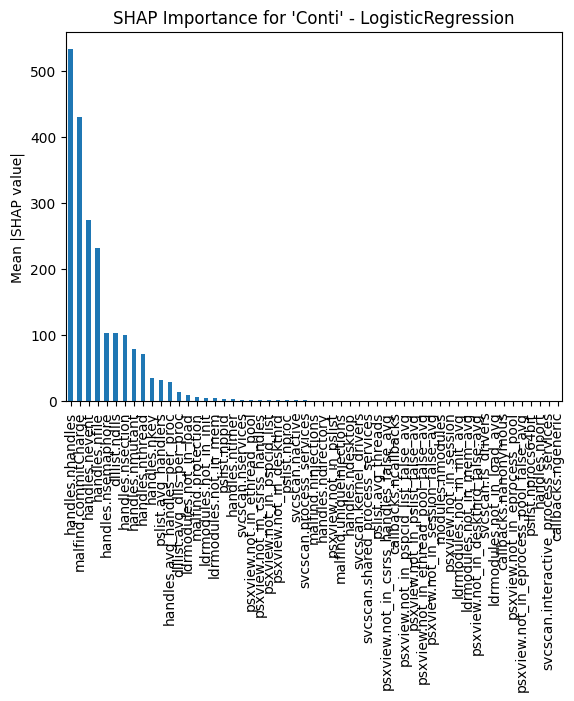


Validation Set Classification Report for LogisticRegression:
              precision    recall  f1-score   support

180solutions     0.1250    0.0222    0.0377        90
         Ako     0.0000    0.0000    0.0000        60
      Benign     0.9980    1.0000    0.9990      1475
         CWS     0.0000    0.0000    0.0000        50
       Conti     0.1778    0.0741    0.1046       108
      Emotet     0.0914    0.2125    0.1278        80
       Gator     0.4505    0.3534    0.3961       116
        Maze     0.1223    0.1889    0.1485        90
        Pysa     0.5714    0.0825    0.1441        97
     Reconyc     0.4286    0.0429    0.0779        70
     Refroso     0.4043    0.4750    0.4368       160
        Scar     0.1364    0.1200    0.1277       100
       Shade     0.1985    0.3714    0.2587        70
        TIBS     0.2375    0.3167    0.2714        60
 Transponder     0.0986    0.1909    0.1300       110
        Zeus     0.1349    0.1278    0.1313       133

    accuracy      

C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati


SHAP Feature Importance for 'Conti' - DecisionTree:
dlllist.avg_dlls_per_proc                 0.016532
svcscan.nservices                         0.015609
malfind.uniqueInjections                  0.006419
ldrmodules.not_in_init_avg                0.002941
malfind.commitCharge                      0.000132
psxview.not_in_deskthrd_false_avg         0.000036
ldrmodules.not_in_mem_avg                 0.000014
callbacks.ncallbacks                      0.000007
psxview.not_in_pslist_false_avg           0.000000
psxview.not_in_deskthrd                   0.000000
psxview.not_in_pspcid_list                0.000000
psxview.not_in_session                    0.000000
psxview.not_in_csrss_handles              0.000000
psxview.not_in_ethread_pool_false_avg     0.000000
psxview.not_in_ethread_pool               0.000000
psxview.not_in_eprocess_pool              0.000000
psxview.not_in_eprocess_pool_false_avg    0.000000
psxview.not_in_session_false_avg          0.000000
psxview.not_in_pspcid_list_fa

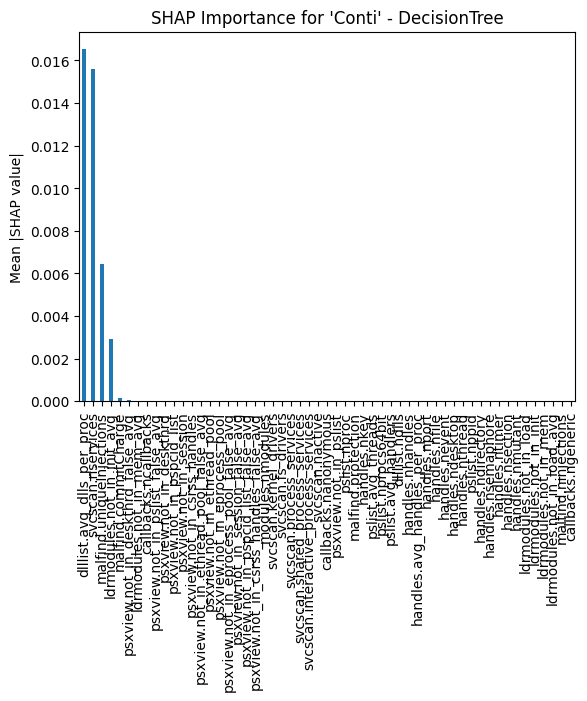


Validation Set Classification Report for DecisionTree:
              precision    recall  f1-score   support

180solutions     0.0000    0.0000    0.0000        90
         Ako     0.0000    0.0000    0.0000        60
      Benign     1.0000    0.9953    0.9976      1475
         CWS     0.0000    0.0000    0.0000        50
       Conti     0.0000    0.0000    0.0000       108
      Emotet     0.0724    1.0000    0.1350        80
       Gator     0.5057    0.3793    0.4335       116
        Maze     0.0000    0.0000    0.0000        90
        Pysa     0.4545    0.0515    0.0926        97
     Reconyc     0.0000    0.0000    0.0000        70
     Refroso     0.9800    0.3063    0.4667       160
        Scar     0.0000    0.0000    0.0000       100
       Shade     0.0000    0.0000    0.0000        70
        TIBS     0.3571    0.1667    0.2273        60
 Transponder     0.2281    0.2364    0.2321       110
        Zeus     0.0000    0.0000    0.0000       133

    accuracy            

C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

Best parameters for SVM: {'clf__C': 1, 'clf__kernel': 'rbf'}
SHAP explanation failed for SVM: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC(C=1, probability=True, random_state=42)

Validation Set Classification Report for SVM:
              precision    recall  f1-score   support

180solutions     1.0000    0.0333    0.0645        90
         Ako     0.0000    0.0000    0.0000        60
      Benign     1.0000    1.0000    1.0000      1475
         CWS     0.0000    0.0000    0.0000        50
       Conti     0.0698    0.0556    0.0619       108
      Emotet     0.1511    0.2625    0.1918        80
       Gator     0.6667    0.3621    0.4693       116
        Maze     0.1831    0.1444    0.1615        90
        Pysa     0.5556    0.0515    0.0943        97
     Reconyc     1.0000    0.0286    0.0556        70
     Refroso     0.9423    0.3063    0.4623       160
        Scar     0.1197    0.1400    0.1290       100
       Shade     

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GroupShuffleSplit, GroupKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_auc_score, classification_report, confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ---------------------------------------------------------PREPROCESSING & ENCODING--------------------------------------------------------
meta_cols = ['Category', 'category_name', 'unique_file_id']
df_meta = df[meta_cols].copy()

le_class = LabelEncoder()
le_category = LabelEncoder()
le_catname = LabelEncoder()

df['Class_encoded'] = le_class.fit_transform(df['Class'])
df['category_encoded'] = le_category.fit_transform(df['category'])
df['category_name_encoded'] = le_catname.fit_transform(df['category_name'])

df['group_id'] = df.apply(lambda row: row['unique_file_id'] 
                                    if row['Class'] != 'Benign' 
                                    else f"benign_{row.name}", axis=1)

# Drop columns used for meta or non-numeric:
features = df.drop(columns=[
    'Category', 'Class', 'category', 'category_name',
    'Class_encoded', 'category_encoded', 'category_name_encoded',
    'unique_file_id', 'group_id'
])
target = df['category_name_encoded']


# ----------------------------------------------------------SPLITTING DATA--------------------------------------------------------------
gss = GroupShuffleSplit(n_splits=1, test_size=0.35, random_state=42)
train_idx, temp_idx = next(gss.split(df, groups=df['group_id']))
train_df = df.iloc[train_idx]
temp_df = df.iloc[temp_idx]

gss_temp = GroupShuffleSplit(n_splits=1, test_size=0.857, random_state=42)
val_idx, test_idx = next(gss_temp.split(temp_df, groups=temp_df['group_id']))
validation_df = temp_df.iloc[val_idx]
test_df = temp_df.iloc[test_idx]

def get_features_and_target(sub_df):
    X = sub_df.drop(columns=[
        'Category', 'Class', 'category', 'category_name', 
        'Class_encoded', 'category_encoded', 'category_name_encoded',
        'unique_file_id', 'group_id'
    ])
    y = sub_df['category_name_encoded']
    return X, y

X_train, y_train = get_features_and_target(train_df)
X_val, y_val = get_features_and_target(validation_df)
X_test, y_test = get_features_and_target(test_df)

meta_val = validation_df[meta_cols].copy()
meta_test = test_df[meta_cols].copy()

total = len(X_train) + len(X_val) + len(X_test)
print("Total records:", total)
print("Train:", len(X_train), f"({round((len(X_train)/total)*100,2)}%)")
print("Test:", len(X_test), f"({round((len(X_test)/total)*100,2)}%)")
print("Validation:", len(X_val), f"({round((len(X_val)/total)*100,2)}%)")


# -------------------------------------------------------CLASSIFIERS & CONFIGURATION--------------------------------------------------
rf_classifier = RandomForestClassifier(
    n_estimators=50, max_depth=5, min_samples_split=4, 
    min_samples_leaf=2, random_state=42
)
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance')
logistic_classifier = LogisticRegression(
    penalty='l2', C=0.5, solver='liblinear', max_iter=1000, random_state=42
)
tree_classifier = DecisionTreeClassifier(
    max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42
)
svm_classifier = SVC(
    kernel='rbf', C=0.5, gamma='scale', probability=True, random_state=42
)

# Classifier dictionary (model, scale_required):
classifiers = {
    'RandomForest': (rf_classifier, False),
    'KNN': (knn_classifier, True),
    'LogisticRegression': (logistic_classifier, True),
    'DecisionTree': (tree_classifier, False),
    'SVM': (svm_classifier, True)
}

# Hyperparameter grids:
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 75],
        'max_depth': [3, 5, 7],
        'min_samples_split': [4, 6],
        'min_samples_leaf': [2, 3]
    },
    'KNN': {
        'n_neighbors': [7, 9, 11]
    },
    'LogisticRegression': {
        'C': [0.1, 0.5, 1]
    },
    'DecisionTree': {
        'max_depth': [3, 5],
        'min_samples_split': [6, 8],
        'min_samples_leaf': [2, 3]
    },
    'SVM': {
        'C': [0.1, 0.5, 1],
        'kernel': ['rbf']
    }
}

results_dict = {}
shap_values_dict = {}
train_groups = train_df['group_id']

# Encoded value for "Conti":
conti_label = "Conti"
conti_encoded = le_catname.transform([conti_label])[0]

# Lists to collect evaluation metrics and SHAP features:
metrics_list = []
shap_features_list = []

# -------------------------------------------------------TRAINING, EVALUATION & SHAP--------------------------------------------------
for clf_name, (clf_obj, scale_required) in classifiers.items():
    print(f"\nTraining and evaluating {clf_name}...")

    # Build pipeline:
    if scale_required:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', clf_obj)
        ])
        # GridSearchCV for relevant classifier:
        if clf_name in param_grids:
            grid = {f'clf__{param}': values for param, values in param_grids[clf_name].items()}
            grid_search = GridSearchCV(
                pipeline, grid, cv=GroupKFold(n_splits=5),
                scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train, groups=train_groups)
            best_model = grid_search.best_estimator_
            print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
        else:
            best_model = pipeline.fit(X_train, y_train)
    else:
        # No scaling:
        if clf_name in param_grids:
            grid_search = GridSearchCV(
                clf_obj, param_grids[clf_name], cv=GroupKFold(n_splits=5),
                scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train, groups=train_groups)
            best_model = grid_search.best_estimator_
            print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
        else:
            best_model = clf_obj.fit(X_train, y_train)


# -------------------------------------------------------Predictions & Metrics--------------------------------------------------------
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    
    y_val_pred_labels = le_catname.inverse_transform(y_val_pred)
    y_val_labels = le_catname.inverse_transform(y_val)
    y_test_pred_labels = le_catname.inverse_transform(y_test_pred)
    y_test_labels = le_catname.inverse_transform(y_test)
    
    # Classification report for each class:
    report_dict = classification_report(y_test_labels, y_test_pred_labels, output_dict=True)
    for class_label, scores in report_dict.items():
        if class_label not in ["accuracy", "macro avg", "weighted avg"]:
            metrics_list.append({
                'Classifier': clf_name,
                'Class': class_label,
                'Precision': scores.get('precision', None),
                'Recall': scores.get('recall', None),
                'F1-score': scores.get('f1-score', None),
                'Support': scores.get('support', None)
            })
    
# -------------------------------------------------------SHAP Feature Importance for "Conti"------------------------------------------
    try:
        # If model is wrapped in pipeline, extract the final estimator
        if scale_required:
            model_for_shap = best_model.named_steps['clf']
        else:
            model_for_shap = best_model
        
        # Create a generic SHAP explainer:
        explainer = shap.Explainer(model_for_shap, X_train, feature_names=X_train.columns)
        shap_values = explainer(X_test)
        
        # Store the SHAP values for potential future plotting:
        shap_values_dict[clf_name] = shap_values

        # If multi-class, isolate the "Conti" class:
        if len(shap_values.values.shape) == 3:
            # shape: (n_samples, n_features, n_classes):
            conti_shap = shap_values.values[:, :, conti_encoded]
            mean_shap = np.abs(conti_shap).mean(axis=0)
        else:
            mean_shap = np.abs(shap_values.values).mean(axis=0)
        
        shap_importance = pd.Series(mean_shap, index=X_test.columns).sort_values(ascending=False)
        
        print(f"\nSHAP Feature Importance for '{conti_label}' - {clf_name}:")
        print(shap_importance)
        

        # Plot a bar chart of all features:
        feature_importance = shap_importance
        feature_importance.plot(kind='bar', title=f"SHAP Importance for '{conti_label}' - {clf_name}")
        plt.ylabel('Mean |SHAP value|')
        plt.show()
        
        # Collect all SHAP features for Excel output:
        for feature, shap_val in feature_importance.items():
            shap_features_list.append({
                'Classifier': clf_name, 
                'Feature': feature, 
                'SHAP Importance': shap_val
            })
    
    except Exception as e:
        print(f"SHAP explanation failed for {clf_name}: {e}")
    

# -----------------------------------------------------------Save Test Results--------------------------------------------------------
    if hasattr(best_model, "predict_proba"):
        test_probs = best_model.predict_proba(X_test)
        predicted_probabilities = [round(prob[label] * 100, 2)
                                   for prob, label in zip(test_probs, y_test_pred)]
    else:
        predicted_probabilities = [None] * len(y_test)
    
    results_test_clf = X_test.copy()
    results_test_clf['Actual_Class'] = y_test_labels
    results_test_clf['Predicted_Class'] = y_test_pred_labels
    results_test_clf['Correct'] = results_test_clf['Actual_Class'] == results_test_clf['Predicted_Class']
    results_test_clf['Prediction_Probability'] = predicted_probabilities
    results_test_clf = results_test_clf.merge(meta_test, left_index=True, right_index=True)
    
    csv_filename = f"{clf_name}_Malware_Type_Test_Results.csv"
    results_test_clf.to_csv(csv_filename, index=False)
    
    # Print Validation and Test Reports:
    print(f"\nValidation Set Classification Report for {clf_name}:")
    print(classification_report(y_val_labels, y_val_pred_labels, digits=4))
    print(f"\nTest Set Classification Report for {clf_name}:")
    print(classification_report(y_test_labels, y_test_pred_labels, digits=4))
    
    results_dict[clf_name] = results_test_clf

# -----------------------------------------------------------SAVE RESULTS TO EXCEL----------------------------------------------------
metrics_df = pd.DataFrame(metrics_list)
shap_features_df = pd.DataFrame(shap_features_list)

with pd.ExcelWriter("Classifier_Results.xlsx") as writer:
    metrics_df.to_excel(writer, sheet_name="Metrics", index=False)
    shap_features_df.to_excel(writer, sheet_name="SHAP_Features", index=False)
    
print("\nCombined classification metrics and SHAP feature importances saved to 'Classifier_Results.xlsx'.")

# Save the datasets:
train_df.to_csv("Train_Dataset_Malware_Type.csv", index=False)
validation_df.to_csv("Validation_Dataset_Malware_Type.csv", index=False)
test_df.to_csv("Test_Dataset_Malware_Type.csv", index=False)


Generating SHAP summary plot for RandomForest...


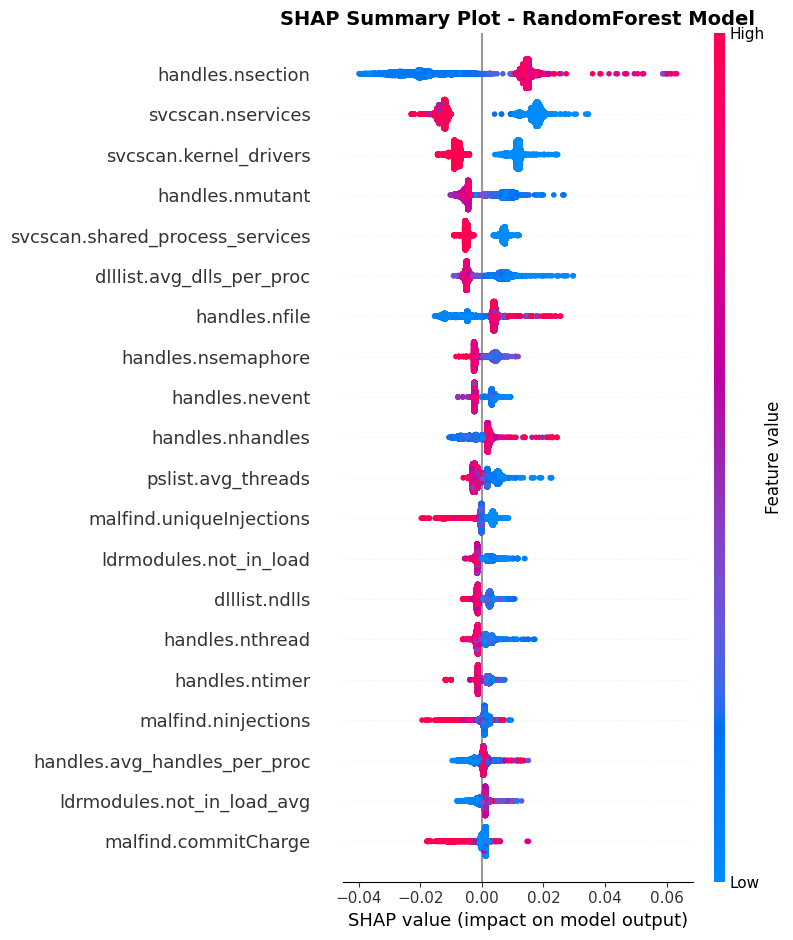

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Choose a classifier for SHAP visualization, change this for different models:
clf_to_plot = "RandomForest"

if clf_to_plot in shap_values_dict:
    shap_values = shap_values_dict[clf_to_plot]

    print(f"\nGenerating SHAP summary plot for {clf_to_plot}...")

    # Convert SHAP Explanation object to NumPy format:
    if isinstance(shap_values, shap.Explanation):
        shap_values_array = shap_values.values
        feature_names = shap_values.feature_names
    else:
        shap_values_array = shap_values
        feature_names = X_test.columns.tolist()

    # Ensure SHAP values are 2D for summary plot:
    if shap_values_array.ndim == 3:
        shap_values_array = shap_values_array[:, :, 0]

    # Convert X_test to NumPy for SHAP compatibility:
    X_test_np = X_test.to_numpy()

    # Add Title to the Plot:
    plt.figure(figsize=(12, 8))
    plt.title(f"SHAP Summary Plot - {clf_to_plot} Model", fontsize=14, fontweight="bold")
    shap.summary_plot(shap_values_array, X_test_np, feature_names=feature_names, show=False)
    plt.show()

else:
    print(f"SHAP values not found for {clf_to_plot}. Ensure training completed successfully.")


Generating SHAP summary plot for LogisticRegression...


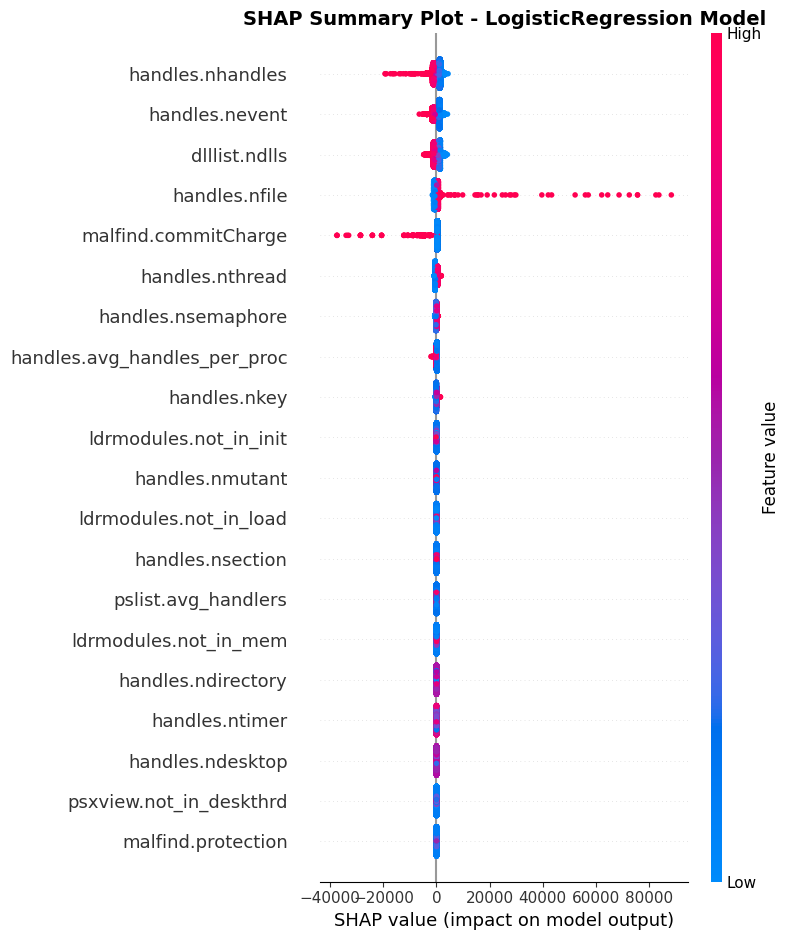

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Choose a classifier for SHAP visualization, change this for different models:
clf_to_plot = "LogisticRegression"

if clf_to_plot in shap_values_dict:
    shap_values = shap_values_dict[clf_to_plot]

    print(f"\nGenerating SHAP summary plot for {clf_to_plot}...")

    # Convert SHAP Explanation object to NumPy format:
    if isinstance(shap_values, shap.Explanation):
        shap_values_array = shap_values.values
        feature_names = shap_values.feature_names
    else:
        shap_values_array = shap_values
        feature_names = X_test.columns.tolist()

    # Ensure SHAP values are 2D for summary plot:
    if shap_values_array.ndim == 3:
        shap_values_array = shap_values_array[:, :, 0]

    # Convert X_test to NumPy for SHAP compatibility:
    X_test_np = X_test.to_numpy()

    # Add Title to the Plot:
    plt.figure(figsize=(12, 8))
    plt.title(f"SHAP Summary Plot - {clf_to_plot} Model", fontsize=14, fontweight="bold")
    shap.summary_plot(shap_values_array, X_test_np, feature_names=feature_names, show=False)
    plt.show()

else:
    print(f"SHAP values not found for {clf_to_plot}. Ensure training completed successfully.")


Generating SHAP summary plot for DecisionTree...


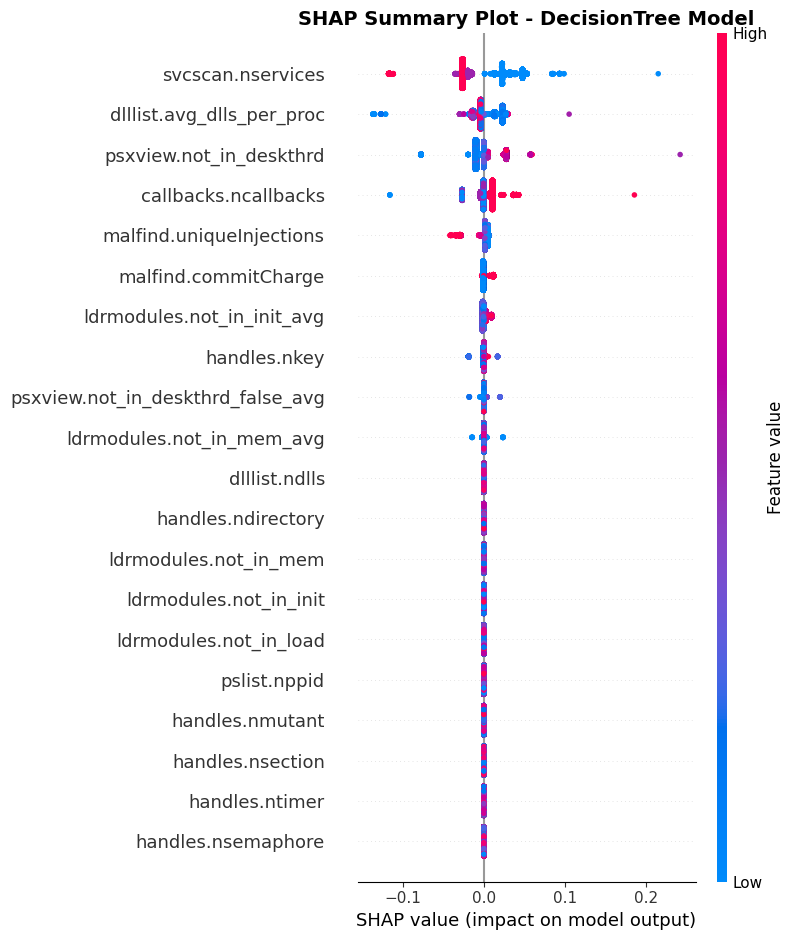

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Choose a classifier for SHAP visualization, change this for different models:
clf_to_plot = "DecisionTree"

if clf_to_plot in shap_values_dict:
    shap_values = shap_values_dict[clf_to_plot]

    print(f"\nGenerating SHAP summary plot for {clf_to_plot}...")

    # Convert SHAP Explanation object to NumPy format:
    if isinstance(shap_values, shap.Explanation):
        shap_values_array = shap_values.values
        feature_names = shap_values.feature_names
    else:
        shap_values_array = shap_values
        feature_names = X_test.columns.tolist()

    # Ensure SHAP values are 2D for summary plot:
    if shap_values_array.ndim == 3:
        shap_values_array = shap_values_array[:, :, 0]

    # Convert X_test to NumPy for SHAP compatibility:
    X_test_np = X_test.to_numpy()

    # Add Title to the Plot:
    plt.figure(figsize=(12, 8))
    plt.title(f"SHAP Summary Plot - {clf_to_plot} Model", fontsize=14, fontweight="bold")
    shap.summary_plot(shap_values_array, X_test_np, feature_names=feature_names, show=False)
    plt.show()

else:
    print(f"SHAP values not found for {clf_to_plot}. Ensure training completed successfully.")


CLASSIFIERS BY MALWARE TYPE WITH svcscan.nservices REMOVED FROM DATASET:

In [ ]:
# Load the dataset:
df_svscan_removed = pd.read_csv(r'INSERT DATASET PATH')

attribute_to_remove = 'svcscan.nservices'

df_svscan_removed = df_svscan_removed.drop(attribute_to_remove, axis=1)

In [66]:
df = df_svscan_removed

# Fill the missing values
df.fillna(method="ffill", inplace=True)

# Create new columns:
df["category"] = df["Category"].apply(find_category)
df["category_name"] = df["Category"].apply(find_category_name)
df["unique_file_id"] = df["Category"].apply(extract_unique_file_id)

# Compute unique file counts per malware family and create a summary DataFrame:
unique_counts = df.groupby('category_name')['unique_file_id'].nunique()
total_records = df['category_name'].value_counts()
df_category_summary = pd.DataFrame({
    'Total_Records': total_records,
    'Unique_File_Counts': unique_counts
})
df_category_summary['Percentage'] = (df_category_summary['Total_Records'] / len(df)) * 100
df_category_summary = df_category_summary.reset_index().rename(columns={'index': 'category_name'})

Total records: 58596
Train: 38199 (65.19%)
Test: 17528 (29.91%)
Validation: 2869 (4.9%)

Training and evaluating RandomForest...
Best parameters for RandomForest: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 75}


100%|===================| 280193/280448 [15:01<00:00]        


SHAP Feature Importance for 'Conti' - RandomForest:
svcscan.kernel_drivers                    6.480734e-03
dlllist.avg_dlls_per_proc                 6.027155e-03
svcscan.shared_process_services           4.403473e-03
handles.nmutant                           3.629675e-03
handles.nsection                          2.836027e-03
malfind.uniqueInjections                  2.074986e-03
handles.nevent                            2.034756e-03
pslist.avg_threads                        1.556270e-03
svcscan.process_services                  1.476374e-03
ldrmodules.not_in_load                    1.426955e-03
malfind.commitCharge                      1.344687e-03
handles.nfile                             1.243511e-03
malfind.protection                        1.231830e-03
ldrmodules.not_in_mem                     1.108219e-03
ldrmodules.not_in_init                    9.621184e-04
ldrmodules.not_in_load_avg                9.086921e-04
malfind.ninjections                       8.830448e-04
handles.avg_

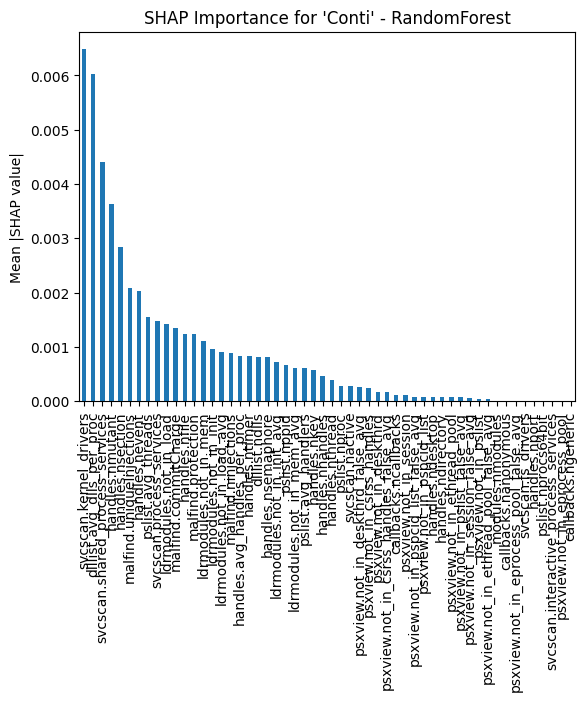


Validation Set Classification Report for RandomForest:
              precision    recall  f1-score   support

180solutions     0.4286    0.0333    0.0619        90
         Ako     0.1455    0.1333    0.1391        60
      Benign     1.0000    1.0000    1.0000      1475
         CWS     0.0000    0.0000    0.0000        50
       Conti     0.0000    0.0000    0.0000       108
      Emotet     0.1633    0.2000    0.1798        80
       Gator     0.6267    0.4052    0.4921       116
        Maze     0.2015    0.3000    0.2411        90
        Pysa     1.0000    0.0515    0.0980        97
     Reconyc     1.0000    0.0286    0.0556        70
     Refroso     0.6744    0.3625    0.4715       160
        Scar     0.1798    0.4100    0.2500       100
       Shade     0.3516    0.4571    0.3975        70
        TIBS     0.5556    0.1667    0.2564        60
 Transponder     0.1728    0.3818    0.2380       110
        Zeus     0.2212    0.5489    0.3153       133

    accuracy            

C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

Best parameters for KNN: {'clf__n_neighbors': 7}
SHAP explanation failed for KNN: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier(n_neighbors=7, weights='distance')

Validation Set Classification Report for KNN:
              precision    recall  f1-score   support

180solutions     0.2319    0.1778    0.2013        90
         Ako     0.0789    0.1000    0.0882        60
      Benign     1.0000    1.0000    1.0000      1475
         CWS     0.0875    0.1400    0.1077        50
       Conti     0.1429    0.1111    0.1250       108
      Emotet     0.2326    0.2500    0.2410        80
       Gator     0.4110    0.5172    0.4580       116
        Maze     0.1683    0.1889    0.1780        90
        Pysa     0.1471    0.1031    0.1212        97
     Reconyc     0.4194    0.1857    0.2574        70
     Refroso     0.5959    0.5437    0.5686       160
        Scar     0.2203    0.2600    0.2385       100
       Shade     

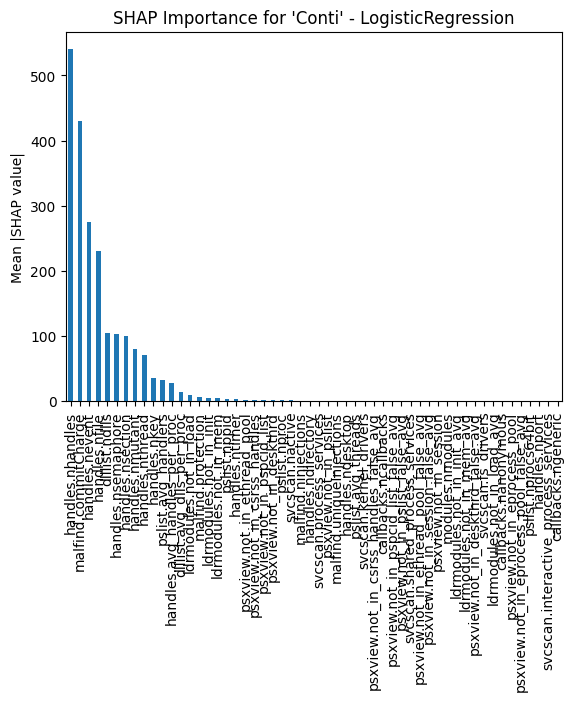


Validation Set Classification Report for LogisticRegression:
              precision    recall  f1-score   support

180solutions     0.1250    0.0222    0.0377        90
         Ako     0.0000    0.0000    0.0000        60
      Benign     0.9980    1.0000    0.9990      1475
         CWS     0.0000    0.0000    0.0000        50
       Conti     0.1778    0.0741    0.1046       108
      Emotet     0.0914    0.2125    0.1278        80
       Gator     0.4505    0.3534    0.3961       116
        Maze     0.1223    0.1889    0.1485        90
        Pysa     0.5714    0.0825    0.1441        97
     Reconyc     0.4286    0.0429    0.0779        70
     Refroso     0.4043    0.4750    0.4368       160
        Scar     0.1364    0.1200    0.1277       100
       Shade     0.1970    0.3714    0.2574        70
        TIBS     0.2405    0.3167    0.2734        60
 Transponder     0.0986    0.1909    0.1300       110
        Zeus     0.1349    0.1278    0.1313       133

    accuracy      

C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati


SHAP Feature Importance for 'Conti' - DecisionTree:
svcscan.shared_process_services           0.021482
pslist.avg_threads                        0.010173
malfind.uniqueInjections                  0.006804
ldrmodules.not_in_init_avg                0.003754
svcscan.process_services                  0.000207
svcscan.nactive                           0.000155
malfind.commitCharge                      0.000138
callbacks.ncallbacks                      0.000036
psxview.not_in_deskthrd_false_avg         0.000028
svcscan.interactive_process_services      0.000000
psxview.not_in_deskthrd                   0.000000
psxview.not_in_pslist                     0.000000
psxview.not_in_eprocess_pool              0.000000
callbacks.nanonymous                      0.000000
psxview.not_in_ethread_pool               0.000000
psxview.not_in_pspcid_list                0.000000
psxview.not_in_csrss_handles              0.000000
psxview.not_in_session                    0.000000
psxview.not_in_eprocess_pool_

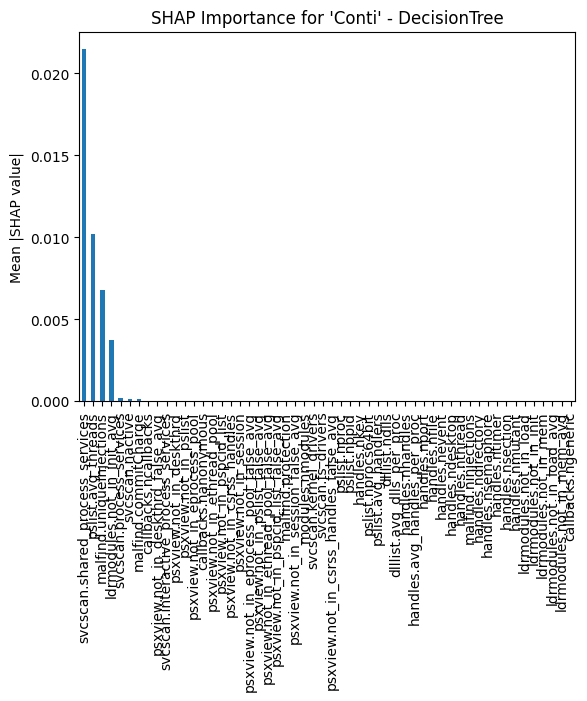


Validation Set Classification Report for DecisionTree:
              precision    recall  f1-score   support

180solutions     0.0000    0.0000    0.0000        90
         Ako     0.0000    0.0000    0.0000        60
      Benign     1.0000    0.9993    0.9997      1475
         CWS     0.0000    0.0000    0.0000        50
       Conti     0.0000    0.0000    0.0000       108
      Emotet     0.0711    1.0000    0.1328        80
       Gator     0.5057    0.3793    0.4335       116
        Maze     0.0000    0.0000    0.0000        90
        Pysa     0.4545    0.0515    0.0926        97
     Reconyc     0.0000    0.0000    0.0000        70
     Refroso     0.9800    0.3063    0.4667       160
        Scar     0.0000    0.0000    0.0000       100
       Shade     0.0000    0.0000    0.0000        70
        TIBS     1.0000    0.1667    0.2857        60
 Transponder     0.2054    0.2091    0.2072       110
        Zeus     0.0000    0.0000    0.0000       133

    accuracy            

C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adamk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

Best parameters for SVM: {'clf__C': 1, 'clf__kernel': 'rbf'}
SHAP explanation failed for SVM: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC(C=1, probability=True, random_state=42)

Validation Set Classification Report for SVM:
              precision    recall  f1-score   support

180solutions     1.0000    0.0333    0.0645        90
         Ako     0.0000    0.0000    0.0000        60
      Benign     1.0000    1.0000    1.0000      1475
         CWS     0.0000    0.0000    0.0000        50
       Conti     0.0698    0.0556    0.0619       108
      Emotet     0.1522    0.2625    0.1927        80
       Gator     0.6667    0.3621    0.4693       116
        Maze     0.1831    0.1444    0.1615        90
        Pysa     0.5556    0.0515    0.0943        97
     Reconyc     1.0000    0.0286    0.0556        70
     Refroso     0.9245    0.3063    0.4601       160
        Scar     0.1186    0.1400    0.1284       100
       Shade     

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GroupShuffleSplit, GroupKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_auc_score, classification_report, confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ---------------------------------------------------------PREPROCESSING & ENCODING--------------------------------------------------------
meta_cols = ['Category', 'category_name', 'unique_file_id']
df_meta = df[meta_cols].copy()

le_class = LabelEncoder()
le_category = LabelEncoder()
le_catname = LabelEncoder()

df['Class_encoded'] = le_class.fit_transform(df['Class'])
df['category_encoded'] = le_category.fit_transform(df['category'])
df['category_name_encoded'] = le_catname.fit_transform(df['category_name'])

df['group_id'] = df.apply(lambda row: row['unique_file_id'] 
                                    if row['Class'] != 'Benign' 
                                    else f"benign_{row.name}", axis=1)

# Drop columns used for meta or non-numeric:
features = df.drop(columns=[
    'Category', 'Class', 'category', 'category_name',
    'Class_encoded', 'category_encoded', 'category_name_encoded',
    'unique_file_id', 'group_id'
])
target = df['category_name_encoded']

# ----------------------------------------------------------SPLITTING DATA--------------------------------------------------------------
gss = GroupShuffleSplit(n_splits=1, test_size=0.35, random_state=42)
train_idx, temp_idx = next(gss.split(df, groups=df['group_id']))
train_df = df.iloc[train_idx]
temp_df = df.iloc[temp_idx]

gss_temp = GroupShuffleSplit(n_splits=1, test_size=0.857, random_state=42)
val_idx, test_idx = next(gss_temp.split(temp_df, groups=temp_df['group_id']))
validation_df = temp_df.iloc[val_idx]
test_df = temp_df.iloc[test_idx]

def get_features_and_target(sub_df):
    X = sub_df.drop(columns=[
        'Category', 'Class', 'category', 'category_name', 
        'Class_encoded', 'category_encoded', 'category_name_encoded',
        'unique_file_id', 'group_id'
    ])
    y = sub_df['category_name_encoded']
    return X, y

X_train, y_train = get_features_and_target(train_df)
X_val, y_val = get_features_and_target(validation_df)
X_test, y_test = get_features_and_target(test_df)

meta_val = validation_df[meta_cols].copy()
meta_test = test_df[meta_cols].copy()

total = len(X_train) + len(X_val) + len(X_test)
print("Total records:", total)
print("Train:", len(X_train), f"({round((len(X_train)/total)*100,2)}%)")
print("Test:", len(X_test), f"({round((len(X_test)/total)*100,2)}%)")
print("Validation:", len(X_val), f"({round((len(X_val)/total)*100,2)}%)")


# -------------------------------------------------------CLASSIFIERS & CONFIGURATION--------------------------------------------------
rf_classifier = RandomForestClassifier(
    n_estimators=50, max_depth=5, min_samples_split=4, 
    min_samples_leaf=2, random_state=42
)
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance')
logistic_classifier = LogisticRegression(
    penalty='l2', C=0.5, solver='liblinear', max_iter=1000, random_state=42
)
tree_classifier = DecisionTreeClassifier(
    max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42
)
svm_classifier = SVC(
    kernel='rbf', C=0.5, gamma='scale', probability=True, random_state=42
)

# Classifier dictionary (model, scale_required):
classifiers = {
    'RandomForest': (rf_classifier, False),
    'KNN': (knn_classifier, True),
    'LogisticRegression': (logistic_classifier, True),
    'DecisionTree': (tree_classifier, False),
    'SVM': (svm_classifier, True)
}

# Hyperparameter grids:
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 75],
        'max_depth': [3, 5, 7],
        'min_samples_split': [4, 6],
        'min_samples_leaf': [2, 3]
    },
    'KNN': {
        'n_neighbors': [7, 9, 11]
    },
    'LogisticRegression': {
        'C': [0.1, 0.5, 1]
    },
    'DecisionTree': {
        'max_depth': [3, 5],
        'min_samples_split': [6, 8],
        'min_samples_leaf': [2, 3]
    },
    'SVM': {
        'C': [0.1, 0.5, 1],
        'kernel': ['rbf']
    }
}

results_dict = {}
shap_values_dict = {}
train_groups = train_df['group_id']

# Encoded value for "Conti":
conti_label = "Conti"
conti_encoded = le_catname.transform([conti_label])[0]

# Lists to collect evaluation metrics and SHAP features:
metrics_list = []
shap_features_list = []

# -------------------------------------------------------TRAINING, EVALUATION & SHAP--------------------------------------------------
for clf_name, (clf_obj, scale_required) in classifiers.items():
    print(f"\nTraining and evaluating {clf_name}...")

    # Build pipeline:
    if scale_required:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', clf_obj)
        ])
        # GridSearchCV for relevant classifier:
        if clf_name in param_grids:
            grid = {f'clf__{param}': values for param, values in param_grids[clf_name].items()}
            grid_search = GridSearchCV(
                pipeline, grid, cv=GroupKFold(n_splits=5),
                scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train, groups=train_groups)
            best_model = grid_search.best_estimator_
            print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
        else:
            best_model = pipeline.fit(X_train, y_train)
    else:
        # No scaling:
        if clf_name in param_grids:
            grid_search = GridSearchCV(
                clf_obj, param_grids[clf_name], cv=GroupKFold(n_splits=5),
                scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train, groups=train_groups)
            best_model = grid_search.best_estimator_
            print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
        else:
            best_model = clf_obj.fit(X_train, y_train)

# -------------------------------------------------------Predictions & Metrics--------------------------------------------------------
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    
    y_val_pred_labels = le_catname.inverse_transform(y_val_pred)
    y_val_labels = le_catname.inverse_transform(y_val)
    y_test_pred_labels = le_catname.inverse_transform(y_test_pred)
    y_test_labels = le_catname.inverse_transform(y_test)
    
    # Classification report for each class:
    report_dict = classification_report(y_test_labels, y_test_pred_labels, output_dict=True)
    for class_label, scores in report_dict.items():
        if class_label not in ["accuracy", "macro avg", "weighted avg"]:
            metrics_list.append({
                'Classifier': clf_name,
                'Class': class_label,
                'Precision': scores.get('precision', None),
                'Recall': scores.get('recall', None),
                'F1-score': scores.get('f1-score', None),
                'Support': scores.get('support', None)
            })

# -------------------------------------------------------SHAP Feature Importance for "Conti"------------------------------------------
    try:
        if scale_required:
            model_for_shap = best_model.named_steps['clf']
        else:
            model_for_shap = best_model
        
        # Create a generic SHAP explainer:
        explainer = shap.Explainer(model_for_shap, X_train, feature_names=X_train.columns)
        shap_values = explainer(X_test)
        
        # Store the SHAP values for potential future plotting:
        shap_values_dict[clf_name] = shap_values

        # If multi-class, isolate the "Conti" class:
        if len(shap_values.values.shape) == 3:
            # shape: (n_samples, n_features, n_classes):
            conti_shap = shap_values.values[:, :, conti_encoded]
            mean_shap = np.abs(conti_shap).mean(axis=0)
        else:
            mean_shap = np.abs(shap_values.values).mean(axis=0)
        
        shap_importance = pd.Series(mean_shap, index=X_test.columns).sort_values(ascending=False)
        
        print(f"\nSHAP Feature Importance for '{conti_label}' - {clf_name}:")
        print(shap_importance)
        

        # Plot a bar chart of all features:
        feature_importance = shap_importance
        feature_importance.plot(kind='bar', title=f"SHAP Importance for '{conti_label}' - {clf_name}")
        plt.ylabel('Mean |SHAP value|')
        plt.show()
        
        # Collect all SHAP features for Excel output:
        for feature, shap_val in feature_importance.items():
            shap_features_list.append({
                'Classifier': clf_name, 
                'Feature': feature, 
                'SHAP Importance': shap_val
            })
    
    except Exception as e:
        print(f"SHAP explanation failed for {clf_name}: {e}")
    
# -----------------------------------------------------------Save Test Results--------------------------------------------------------
    if hasattr(best_model, "predict_proba"):
        test_probs = best_model.predict_proba(X_test)
        predicted_probabilities = [round(prob[label] * 100, 2)
                                   for prob, label in zip(test_probs, y_test_pred)]
    else:
        predicted_probabilities = [None] * len(y_test)
    
    results_test_clf = X_test.copy()
    results_test_clf['Actual_Class'] = y_test_labels
    results_test_clf['Predicted_Class'] = y_test_pred_labels
    results_test_clf['Correct'] = results_test_clf['Actual_Class'] == results_test_clf['Predicted_Class']
    results_test_clf['Prediction_Probability'] = predicted_probabilities
    results_test_clf = results_test_clf.merge(meta_test, left_index=True, right_index=True)
    
    csv_filename = f"{clf_name}_Malware_Type_Test_Results_svcscan_Removed.csv"
    results_test_clf.to_csv(csv_filename, index=False)
    
    # Print Validation and Test Reports
    print(f"\nValidation Set Classification Report for {clf_name}:")
    print(classification_report(y_val_labels, y_val_pred_labels, digits=4))
    print(f"\nTest Set Classification Report for {clf_name}:")
    print(classification_report(y_test_labels, y_test_pred_labels, digits=4))
    
    results_dict[clf_name] = results_test_clf

# -----------------------------------------------------------SAVE RESULTS TO EXCEL----------------------------------------------------
metrics_df = pd.DataFrame(metrics_list)
shap_features_df = pd.DataFrame(shap_features_list)

with pd.ExcelWriter("Classifier_Results_svcscan_Removed.xlsx") as writer:
    metrics_df.to_excel(writer, sheet_name="Metrics", index=False)
    shap_features_df.to_excel(writer, sheet_name="SHAP_Features", index=False)
    
print("\nCombined classification metrics and SHAP feature importances saved to 'Classifier_Results_svcscan_Removed.xlsx'.")

# Save the datasets:
train_df.to_csv("Train_Dataset_Malware_Type_svcscan_Removed.csv", index=False)
validation_df.to_csv("Validation_Dataset_Malware_Type_svcscan_Removed.csv", index=False)
test_df.to_csv("Test_Dataset_Malware_Type_svcscan_Removed.csv", index=False)


Generating SHAP summary plot for RandomForest...


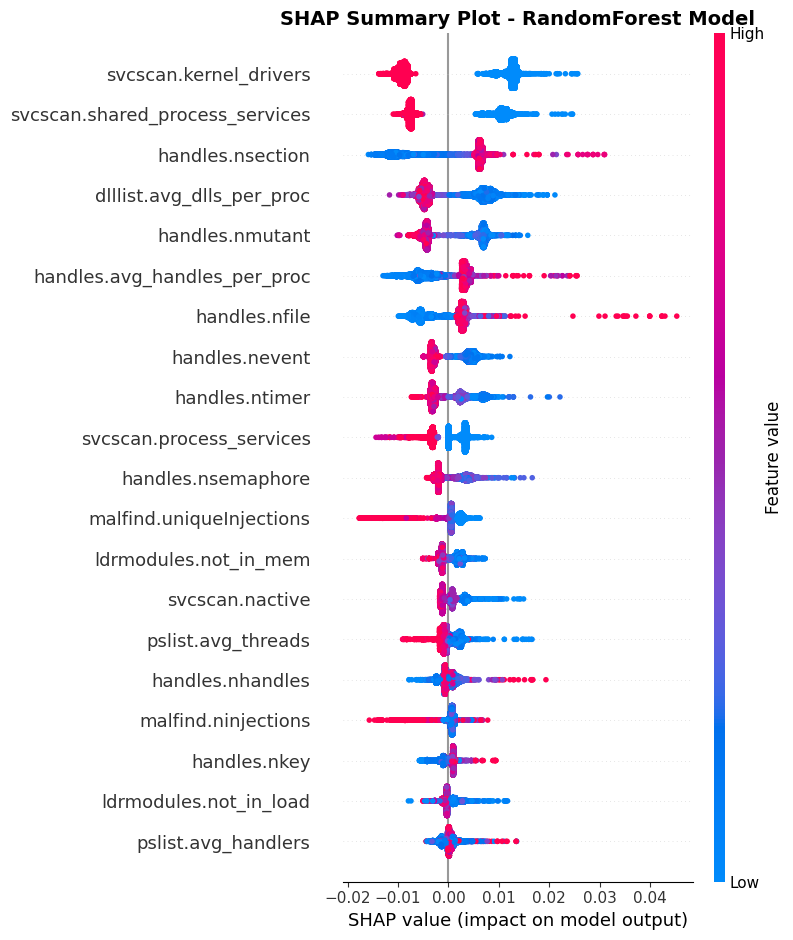

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Choose a classifier for SHAP visualization, change this for different models:
clf_to_plot = "RandomForest"

if clf_to_plot in shap_values_dict:
    shap_values = shap_values_dict[clf_to_plot]

    print(f"\nGenerating SHAP summary plot for {clf_to_plot}...")

    # Convert SHAP Explanation object to NumPy format:
    if isinstance(shap_values, shap.Explanation):
        shap_values_array = shap_values.values
        feature_names = shap_values.feature_names
    else:
        shap_values_array = shap_values
        feature_names = X_test.columns.tolist()

    # Ensure SHAP values are 2D for summary plot:
    if shap_values_array.ndim == 3:
        shap_values_array = shap_values_array[:, :, 0]

    # Convert X_test to NumPy for SHAP compatibility:
    X_test_np = X_test.to_numpy()

    # Add Title to the Plot:
    plt.figure(figsize=(12, 8))
    plt.title(f"SHAP Summary Plot - {clf_to_plot} Model", fontsize=14, fontweight="bold")
    shap.summary_plot(shap_values_array, X_test_np, feature_names=feature_names, show=False)
    plt.show()

else:
    print(f"SHAP values not found for {clf_to_plot}. Ensure training completed successfully.")


Generating SHAP summary plot for DecisionTree...


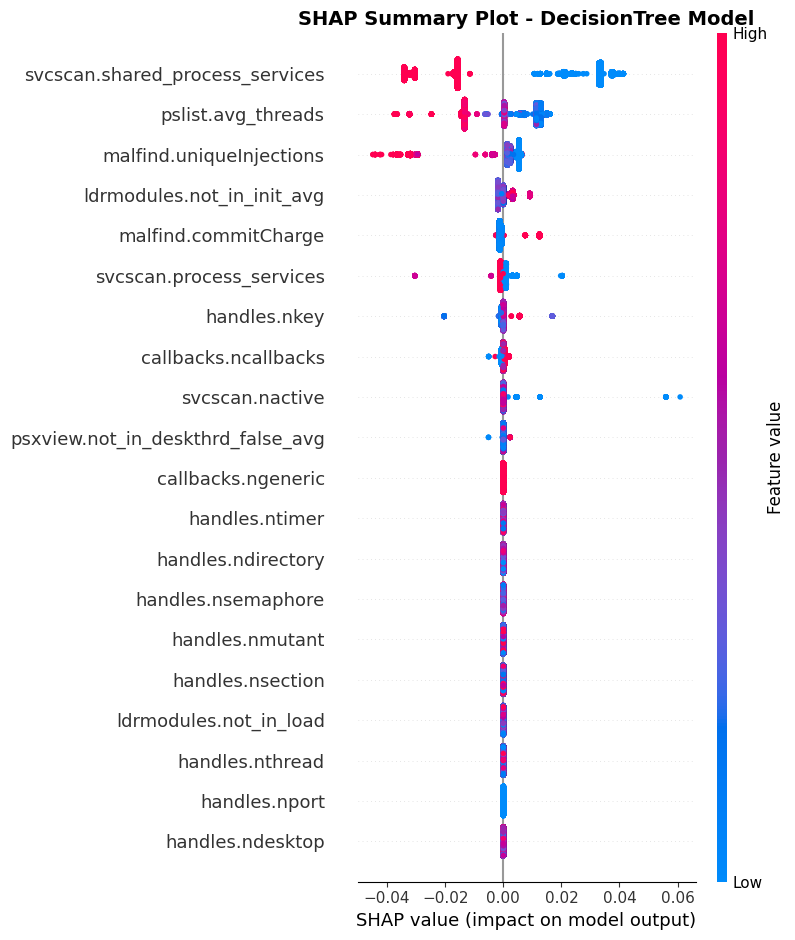

In [69]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Choose a classifier for SHAP visualization, change this for different models:
clf_to_plot = "DecisionTree"

if clf_to_plot in shap_values_dict:
    shap_values = shap_values_dict[clf_to_plot]

    print(f"\nGenerating SHAP summary plot for {clf_to_plot}...")

    # Convert SHAP Explanation object to NumPy format:
    if isinstance(shap_values, shap.Explanation):
        shap_values_array = shap_values.values
        feature_names = shap_values.feature_names
    else:
        shap_values_array = shap_values
        feature_names = X_test.columns.tolist()

    # Ensure SHAP values are 2D for summary plot:
    if shap_values_array.ndim == 3:
        shap_values_array = shap_values_array[:, :, 0]

    # Convert X_test to NumPy for SHAP compatibility:
    X_test_np = X_test.to_numpy()

    # Add Title to the Plot:
    plt.figure(figsize=(12, 8))
    plt.title(f"SHAP Summary Plot - {clf_to_plot} Model", fontsize=14, fontweight="bold")
    shap.summary_plot(shap_values_array, X_test_np, feature_names=feature_names, show=False)
    plt.show()

else:
    print(f"SHAP values not found for {clf_to_plot}. Ensure training completed successfully.")


Generating SHAP summary plot for LogisticRegression...


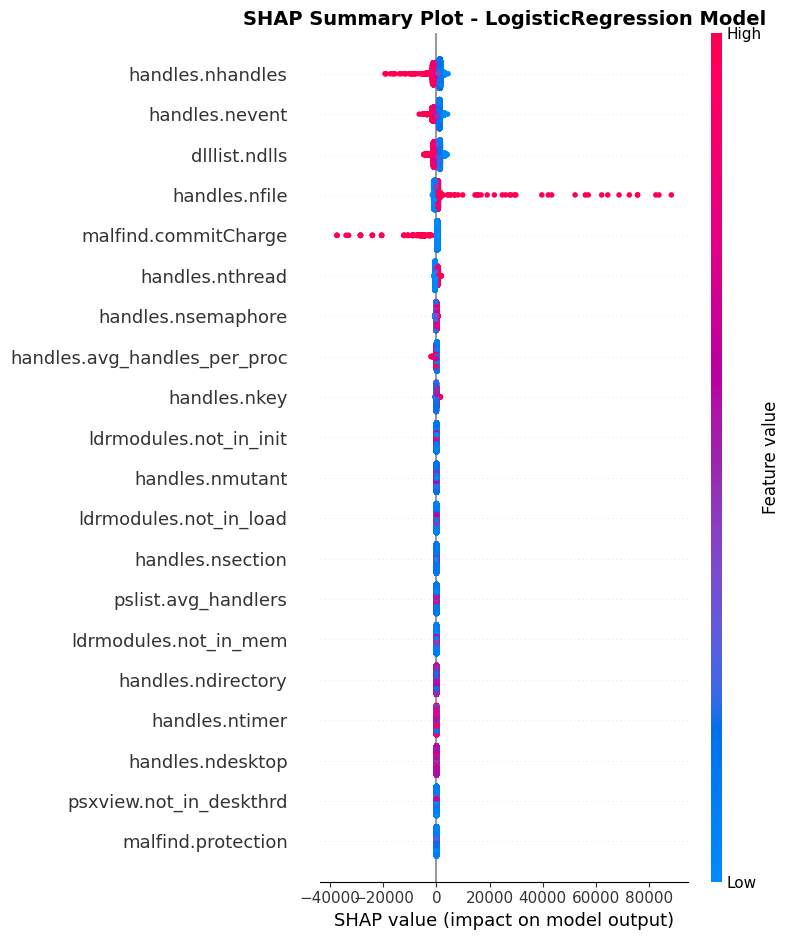

In [70]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Choose a classifier for SHAP visualization, change this for different models:
clf_to_plot = "LogisticRegression"

if clf_to_plot in shap_values_dict:
    shap_values = shap_values_dict[clf_to_plot]

    print(f"\nGenerating SHAP summary plot for {clf_to_plot}...")

    # Convert SHAP Explanation object to NumPy format:
    if isinstance(shap_values, shap.Explanation):
        shap_values_array = shap_values.values
        feature_names = shap_values.feature_names
    else:
        shap_values_array = shap_values
        feature_names = X_test.columns.tolist()

    # Ensure SHAP values are 2D for summary plot:
    if shap_values_array.ndim == 3:
        shap_values_array = shap_values_array[:, :, 0]

    # Convert X_test to NumPy for SHAP compatibility:
    X_test_np = X_test.to_numpy()

    # Add Title to the Plot:
    plt.figure(figsize=(12, 8))
    plt.title(f"SHAP Summary Plot - {clf_to_plot} Model", fontsize=14, fontweight="bold")
    shap.summary_plot(shap_values_array, X_test_np, feature_names=feature_names, show=False)
    plt.show()

else:
    print(f"SHAP values not found for {clf_to_plot}. Ensure training completed successfully.")